# Making a network

For this class most of the types of network you will want to make can be produced by _metaknowledge_. The first three co-citation network, citation network and co-author network are specialized versions of the last three one-mode network, two-mode network and multi-mode network.

First we need to import metaknowledge and because we will be dealing with graphs the graphs package _networkx_ as should be imported


In [1]:
import metaknowledge as mk
import networkx as nx

And so we can visualize the graphs


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import metaknowledge.contour.plotting as mkv

Before we start we should also get a `RecordCollection` to work with.


In [3]:
RC = mk.RecordCollection('../savedrecs.txt')

Now lets look at the different types of graph.

# Making a co-citation network

To make a basic co-citation network of Records use [networkCoCitation()](../documentation/classes/RecordCollection.html#metaknowledge.RecordCollection.networkCoCitation).


In [4]:
CoCitation = RC.networkCoCitation()
print(mk.graphStats(CoCitation, makeString = True)) #makestring by default is True so it is not strictly necessary to include

The graph has 601 nodes, 19492 edges, 0 isolates, 4 self loops, a density of 0.108109 and a transitivity of 0.691662


[graphStats()](../documentation/functions_methods/index.html#metaknowledge.graphHelpers.graphStats) is a function to extract some of the statists of a graph and make them into a nice string.

`CoCitation` is now a [networkx](https://networkx.github.io/documentation/networkx-1.9.1/) graph of the co-citation network, with the hashes of the `Citations` as nodes and the full citations stored  as an attributes. Lets look at one node


In [5]:
CoCitation.nodes(data = True)[0]

(5308678917494226943,
 {'count': 1, 'info': 'CAVALLERI G, 1974, LETT NUOVO CIMENTO, V12, P626'})

and an edge


In [6]:
CoCitation.edges(data = True)[0]

(5308678917494226943, 7204849785423671553, {'weight': 1})

All the graphs _metaknowledge_ use are _networkx_ graphs, a few functions to trim them are implemented in _metaknowledge_, [here](#Post-processing-graphs) is the example section, but many useful functions are implemented by it. Read the documentation [here](https://networkx.github.io/documentation/networkx-1.9.1/) for more information.

The `networkCoCitation()` function has many options for filtering and determining the nodes. The default is to use the `Citations` themselves. If you wanted to make a network of co-citations of journals you would have to make the node type `'journal'` and remove the non-journals.


In [7]:
coCiteJournals = RC.networkCoCitation(nodeType = 'journal', dropNonJournals = True)
print(mk.graphStats(coCiteJournals))

The graph has 89 nodes, 1383 edges, 0 isolates, 40 self loops, a density of 0.353166 and a transitivity of 0.640306


Lets take a look at the graph after a quick spring layout


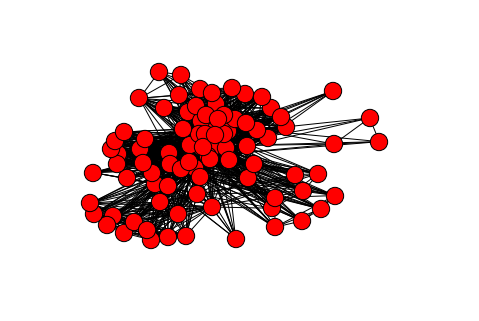

In [8]:
nx.draw_spring(coCiteJournals)

A bit basic but gives a general idea. If you want to make a much better looking and more informative visualization you could try [gephi](https://gephi.github.io/) or [visone](http://visone.info/). Exporting to them is covered below in [Exporting graphs](#Exporting-graphs).

# Making a citation network

The [networkCitation()](../documentation/classes/RecordCollection.html#metaknowledge.RecordCollection.networkCitation) method is nearly identical to `networkCoCitation()` in its parameters. It has one additional keyword argument `directed` that controls if it produces a directed network. Read [Making a co-citation network](#Making-a-co-citation-network) to learn more about `networkCitation()`.

One small example is still worth providing. If you want to make a network of the citations of years by other years and have the letter `'A'` in them then you would write:


In [9]:
citationsA = RC.networkCitation(nodeType = 'year', keyWords = ['A'])
print(mk.graphStats(citationsA))

The graph has 18 nodes, 24 edges, 0 isolates, 1 self loops, a density of 0.0784314 and a transitivity of 0.0344828


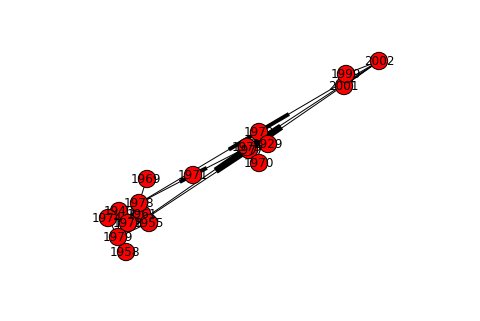

In [10]:
nx.draw_spring(citationsA, with_labels = True)

# Making a co-author network

The [networkCoAuthor()](../documentation/classes/RecordCollection.html#metaknowledge.RecordCollection.networkCoAuthor) function produces the co-authorship network of the RecordCollection as is used as shown


In [11]:
coAuths = RC.networkCoAuthor()
print(mk.graphStats(coAuths))

The graph has 45 nodes, 46 edges, 9 isolates, 0 self loops, a density of 0.0464646 and a transitivity of 0.822581


# Making a one-mode network

In addition to the specialized network generators _metaknowledge_ lets you make a one-mode co-occurence network of any of the WOS tags, with the [oneModeNetwork()](http://networkslab.org/metaknowledge/docs/RecordCollection#oneModeNetwork) function. For examples the WOS subject tag `'WC'` can be examined.


In [12]:
wcCoOccurs = RC.oneModeNetwork('WC')
print(mk.graphStats(wcCoOccurs))

The graph has 9 nodes, 3 edges, 3 isolates, 0 self loops, a density of 0.0833333 and a transitivity of 0


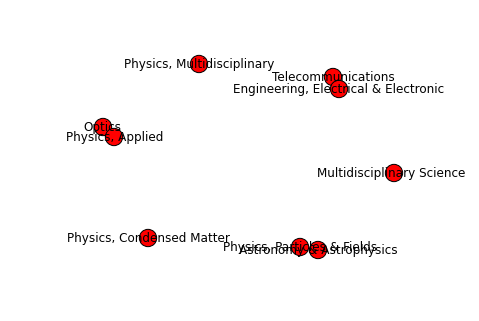

In [13]:
nx.draw_spring(wcCoOccurs, with_labels = True)

# Making a two-mode network

If you wish to study the relationships between 2 tags you can use the [twoModeNetwork()](http://networkslab.org/metaknowledge/docs/RecordCollection#twoModeNetwork) function which creates a two mode network showing the connections between the tags. For example to look at the connections between titles(`'TI'`) and subjects (`'WC'`)


In [14]:
ti_wc = RC.twoModeNetwork('WC', 'title')
print(mk.graphStats(ti_wc))

The graph has 40 nodes, 35 edges, 0 isolates, 0 self loops, a density of 0.0448718 and a transitivity of 0


The network is directed by default with the first tag going to the second.


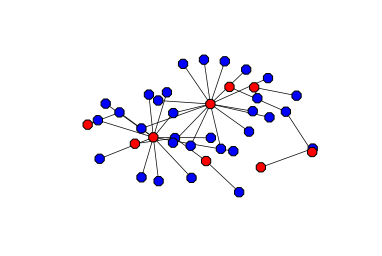

In [15]:
mkv.quickVisual(ti_wc, showLabel = False) #default is False as there are usually lots of labels

[quickVisual()](../documentation/modules/contour.html#metaknowledge.contour.plotting.quickVisual) makes a graph with the different types of nodes coloured differently and a couple other small visual tweaks from _networkx_'s `draw_spring`.

# Making a multi-mode network

For any number of tags the [nModeNetwork()](http://networkslab.org/metaknowledge/docs/RecordCollection#nModeNetwork) function will do the same thing as the `oneModeNetwork()` but with any number of tags and it will keep track of their types. So to look at the co-occurence of titles `'TI'`, WOS number `'UT'` and authors `'AU'`.


In [16]:
tags = ['TI', 'UT', 'AU']
multiModeNet = RC.nModeNetwork(tags)
mk.graphStats(multiModeNet)

'The graph has 108 nodes, 163 edges, 0 isolates, 0 self loops, a density of 0.0282105 and a transitivity of 0.443946'

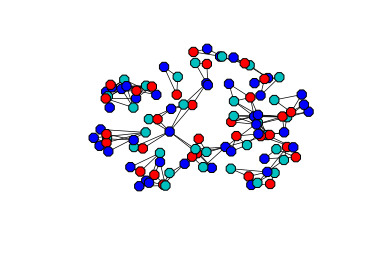

In [17]:
mkv.quickVisual(multiModeNet)

Beware this can very easily produce hairballs


In [18]:
tags = mk.tagsAndNames #All the tags, twice
sillyMultiModeNet = RC.nModeNetwork(tags)
mk.graphStats(sillyMultiModeNet)

'The graph has 1184 nodes, 59573 edges, 0 isolates, 1184 self loops, a density of 0.0850635 and a transitivity of 0.492152'

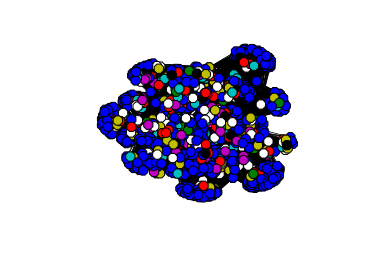

In [19]:
mkv.quickVisual(sillyMultiModeNet)

# Post processing graphs

If you wish to apply a well known algorithm or process to a graph [networkx](https://networkx.github.io/documentation/networkx-1.9.1/) is a good place to look as they do a good job at implementing  them.

One of the features it lacks though is pruning of graphs, _metaknowledge_ has these capabilities. To remove edges outside of some weight range, use [dropEdges()](../documentation/functions_methods/index.html#metaknowledge.graphHelpers.dropEdges). For example if you wish to remove the self loops, edges with weight less than 2 and weight higher than 10 from `coCiteJournals`.


In [20]:
minWeight = 3
maxWeight = 10
proccessedCoCiteJournals = mk.dropEedges(coCiteJournals, minWeight, maxWeight, dropSelfLoops = True)
mk.graphStats(proccessedCoCiteJournals)

'The graph has 89 nodes, 466 edges, 1 isolates, 0 self loops, a density of 0.118999 and a transitivity of 0.213403'

Then to remove all the isolates, i.e. nodes with degree less than 1, use [dropNodesByDegree()](../documentation/functions_methods/index.html#metaknowledge.graphHelpers.dropNodesByDegree)


In [21]:
proccessedCoCiteJournals = mk.dropNodesByDegree(proccessedCoCiteJournals, 1)
mk.graphStats(proccessedCoCiteJournals)

'The graph has 88 nodes, 466 edges, 0 isolates, 0 self loops, a density of 0.121735 and a transitivity of 0.213403'

Now before the processing the graph can be seen [here](#Making-a-co-citation-network). After the processing it looks like


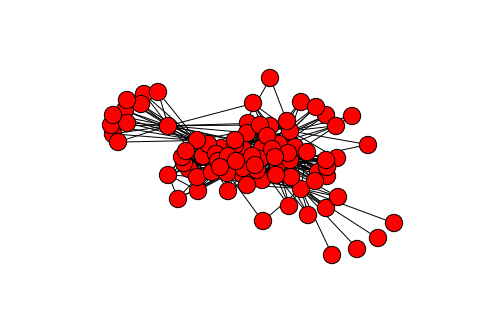

In [22]:
nx.draw_spring(proccessedCoCiteJournals)

Hm, it looks a bit thinner. Using a visualizer will make the difference a bit more noticeable.

#Exporting graphs

Now you have a graph the last step is to write it to disk. _networkx_ has a few ways of doing this, but they tend to be slow. _metaknowledge_ can write an edge list and node attribute file that contain all the information of the graph. The function to do this is called [writeGraph()](../documentation/functions_methods/index.html#metaknowledge.graphHelpers.writeGraph). You give it the start of the file name and it makes two labeled files containing the graph.

In [23]:
mk.writeGraph(proccessedCoCiteJournals, "FinalJournalCoCites")

These files are simple CSVs an can be read easily by most systems. If you want to read them back into Python the [readGraph()](../documentation/functions_methods/index.html#metaknowledge.graphHelpers.readGraph) function will do that.


In [24]:
 FinalJournalCoCites = mk.readGraph("FinalJournalCoCites_edgeList.csv", "FinalJournalCoCites_nodeAttributes.csv")
mk.graphStats(FinalJournalCoCites)

'The graph has 88 nodes, 466 edges, 0 isolates, 0 self loops, a density of 0.121735 and a transitivity of 0.213403'

This is full example workflow for _metaknowledge_, the package is flexible and you hopefully will be able to customize it to do what you want (I assume you do not want the Records staring with 'A').